In [32]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import scipy.constants as constants
%matplotlib inline

In [33]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# The Ising model in 2D
The Hamiltonian of the Ising model is

$$
\mathcal{H} = -\sum_{\langle ij \rangle} J s_i s_j - H \sum_i s_i
$$

In this exercise, we focus on the case $J=1, H=0$, that is, a ferromagnetic system with no external field. Remember that the sum $\langle ij \rangle$ runs over neighbouring sites only. In our 2D lattice, each site has 4 neighbours. 

<img src="attachment:image.png" width="250"> 


We will work with **periodic boundary conditions**, so that all spins have 4 neighbours. 

<img src="attachment:image.png" width="250"> 


# The Metropolis algorithm
We will build a simple implementation of the **Metropolis** algorithm for the 2D Ising model. 

As a reminder, a single update of the Metropolis algorithm works as follows:

1. Pick a site $(i, j)$ at random.
2. Calculate the energy change $\Delta E$ that flipping the spin $s_{ij}$ would produce.
3. If $\Delta E <0$, flip the spin with probability $1$.
4. If $\Delta E >0$, flip the spin with probability $e^{-\beta \Delta E}$.

### Exercice 4.1
Write a function that, given an integer $N$, returns an $N \times N$ array whose elements are randomly picked from {-1, 1}. 

In [34]:
def create_initial_config(N=None):
    """
    Create the starting initial configuration.
    
    All elements are {-1, 1} with 50% prob.
    The lattice is a square of size N.
    
    Parameters
    ----------
    N : int
        The system size.

    Returns
    -------
    config : np.array, (N, N)
        A random {-1, 1} array of size (N, N).
    """
    config = np.random.randint( low = 0, high = 2, size = (N,N))
    config = config *2 -1
    return config

Let us create an initail configuration with our `create_inital_config_function`. A system size of $N=100$ will be enough.

In [35]:
config = create_initial_config(N=100)

To plot our system we can use `plt.imshow()`, as follows:

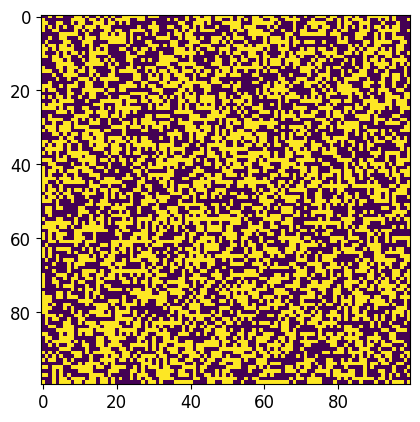

In [36]:
plt.imshow(config);

### Exercise 4.2
We will write our Metropolis update function. Given a site $(i, j)$, what is the change in energy $\Delta E$ that flipping $S(i, j)$ entails?
Recall that only 4 spins are connected to $(i, j)$, so you don't need to compute the energy of the whole system.

Each neighbouring site k is alwais going to contribute with $\Delta E_k = 2 s_{ij}s_k$ since the sum $s_{ij}s_k$ necessarily changes its sign after a spin flip, plus the change of energy is consistent with the fact that flipping from a configuration with alligned spins increases the energy. $\Delta E = {\sum}_k \Delta E_k = 2 s_{ij} {\sum}_k s_{k}$ 

### Exercise 4.3
Write a function called `metropolis_single_update()`.  
The **input** should be:

+ *config*, a lattice configuration as an (N, N) array.
+ *T*, the temperatue.

There is no need to return anything since in python, functions can modify its input, so we will be updating config *inplace*. But it is useful to return the energy change $\Delta E$ if one later wants to track the energy during simulations. To simplify things, we will use **periodic boundary conditions** (in python, the modulo operator is `%`).

In [39]:
def metropolis_single_update(config=None, T=None):
    '''
    Do a single Monte Carlo update using Metropolis algorithm.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The current configuration.
    T : float
        The temperature.

    '''
    # make sure config is square
    N, M = config.shape
    assert M == N
    
    # choose random site
    i = np.random.randint(0,N)
    j = np.random.randint(0,N)
    s =  config[i, j]
        
    # compute energy cost of flip
    # DeltaE is the possible energy cost
    # effDeltaE is the real energy cost (depending on whether we did the flip or not)
    DeltaE = 2*s *(config[ (i+1)%N,j] + config[i,(j+1)%N] + config[i-1,j] + config[i,j-1] )
    effDeltaE = 0

    # case DeltaE < 0, flip the spin with prob 1 
    if DeltaE < 0:
        # flip the sping
        s *= -1
        # set effective DeltaE to DeltaE 
        effDeltaE = DeltaE
        
    # case DeltaE >= 0
    else:
        # flip the spin with certain probability

        flip_prob = np.exp( -DeltaE / T)
        coin = np.random.rand()
        
        #print(flip_prob, coin)
        
        if coin < flip_prob:
            # flip the sping
            s *= -1
            # set effective Delta E 
            effDeltaE = DeltaE
        
    # update configuration
    # notice there is no need to return the whole configuration, the function
    # will modify config _in_place_
    config[i, j] = s
    
    # but it is clever to return the effective DeltaE, since we have already computed it
    # notice that if we didn't flip the spin, the change in energy is 0
    return effDeltaE

## Visualizing the simulation on real time
To see if our Metropolis algorithm works, you might want to simulate systems at different temperatures, and observe how the configuration evolves trought time. To do this you need the `display` module. Below you will find an example of how to use it.

For the 2D Ising model, the **critical temperature** is known to be
$$
T_c = \frac{2}{\ln(1+\sqrt{2})} \simeq 2.2691853...
$$
(with $k_B=1$). Try executing the cell below at different values of the temperature, for different system size. 

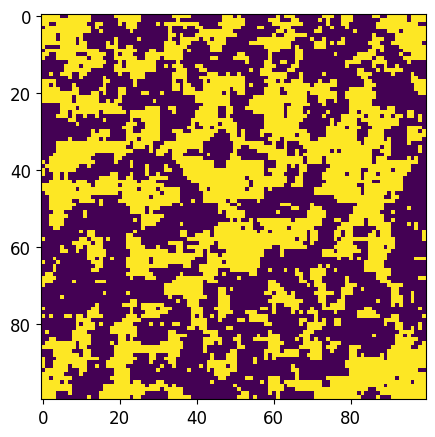

In [40]:
%matplotlib inline

T_c = 2/np.log(1+np.sqrt(2))

# create initial random configuration
config = create_initial_config(N=100)

# set up figure, plot first frame
#fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_c)
    # replot every 1000 MC updates
    if t%1000==0:
        pass
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

Trying out matplotlib animation feature

In [45]:
#generatin animation data

T_c = 2/np.log(1+np.sqrt(2))
#T_c = 9

# create initial random configuration
config = create_initial_config(N=100)

n_frames = 60*20    #20 sec
frames_skip = 1000 #updates between frames
size = 100
anim_data = np.empty( (size,size, n_frames) )

for t in range( n_frames * frames_skip):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_c)
    # replot every 1000 MC updates
    if t%frames_skip==0:

        step = int(t/frames_skip)
        anim_data[:,:,step] = config

<IPython.core.display.Javascript object>


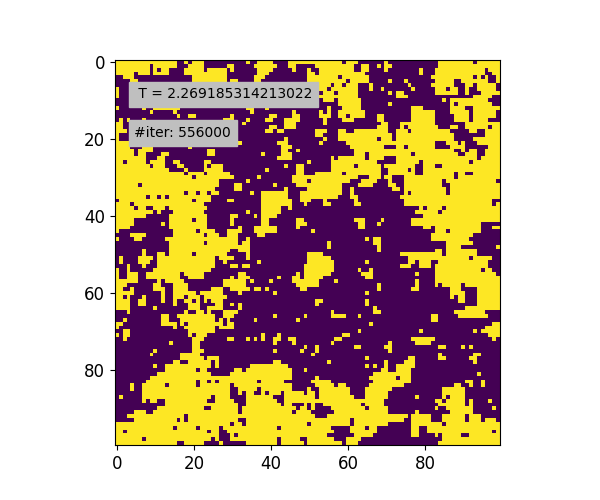

In [46]:
# following this interesting example for the double pendulum
# https://matplotlib.org/stable/gallery/animation/double_pendulum.html

import matplotlib.animation as animation

#magic needed to render animation correctly
#does not work in VS Code
%matplotlib notebook


# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)
temp_text = ax.text(0.05, 0.9, " T = {}".format(T_c), transform=ax.transAxes, backgroundcolor='0.75')
iter_template = '#iter: {}'
iter_text = ax.text(0.05, 0.8, "", transform=ax.transAxes, backgroundcolor='0.75')

#animating function
def animate(i):
    
    im.set_data( anim_data[:,:,i])
    iter_text.set_text( iter_template.format(i*frames_skip))

    return im, iter_text


anim = animation.FuncAnimation (fig, animate, n_frames, interval = 17, blit = True)

plt.show()


### Exercice 4.4
Write a function that computes the energy of a configuration, and another that tracks its evolution over time.

In [47]:
def get_energy(config):
    """
    Compute the energy of a configuration.
    
    The energy is defined as $E = -\sum_{(a, b)} S_a S_b$,    
    where the sum runs over pairs of adjacent spins.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The system configuration.
        
        
    Returns
    -------
    E : float
        The energy of the configuration.
    """
    N = len(config)
    # list of pairs of adjacent sites as four-element tuples:
    # (i1, j1, i2, j2) represents two adjacent sites located
    # at (i1, j1) and (i2, j2)
    horizontal_edges = [
        (i, j-1, i, j)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i-1, j, i, j)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1,j1]*config[i2,j2]
    
    return E

In [51]:
def get_energy_evolution(N=20, T=T_c, n_updates=100000):
    """
    Compute the energy evolution of a 2D Ising instance.
    
    Parameters
    ----------
    N : int
        The system size.
    T : float
        The temperature.
    n_updates : int
        Number of Metropolis updates.
        
    Returns
    -------
    Es : np.array, (n_updates, )
    """
    out = np.empty( n_updates)
    aConfig = create_initial_config(N)
    out[0] = get_energy(aConfig)

    for i in range( len(out) -1):

        if i%1000 == 0:
            print("Iteration \t {} out of {}".format(i, n_updates))
        out[i+1] = metropolis_single_update(aConfig, T=T)+ out[i]
    
    return out

### Exercise 4.5
Compute the energy of your system during a long simulation, and plot it as a function of time. **Tip** Use logarithmic x-axis!

In [56]:
energy_evolution = get_energy_evolution(N = 100, n_updates=1000000)

Iteration 	 0 out of 1000000
Iteration 	 1000 out of 1000000
Iteration 	 2000 out of 1000000
Iteration 	 3000 out of 1000000
Iteration 	 4000 out of 1000000
Iteration 	 5000 out of 1000000
Iteration 	 6000 out of 1000000
Iteration 	 7000 out of 1000000
Iteration 	 8000 out of 1000000
Iteration 	 9000 out of 1000000
Iteration 	 10000 out of 1000000
Iteration 	 11000 out of 1000000
Iteration 	 12000 out of 1000000
Iteration 	 13000 out of 1000000
Iteration 	 14000 out of 1000000
Iteration 	 15000 out of 1000000
Iteration 	 16000 out of 1000000
Iteration 	 17000 out of 1000000
Iteration 	 18000 out of 1000000
Iteration 	 19000 out of 1000000
Iteration 	 20000 out of 1000000
Iteration 	 21000 out of 1000000
Iteration 	 22000 out of 1000000
Iteration 	 23000 out of 1000000
Iteration 	 24000 out of 1000000
Iteration 	 25000 out of 1000000
Iteration 	 26000 out of 1000000
Iteration 	 27000 out of 1000000
Iteration 	 28000 out of 1000000
Iteration 	 29000 out of 1000000
Iteration 	 30000 out o

Iteration 	 273000 out of 1000000
Iteration 	 274000 out of 1000000
Iteration 	 275000 out of 1000000
Iteration 	 276000 out of 1000000
Iteration 	 277000 out of 1000000
Iteration 	 278000 out of 1000000
Iteration 	 279000 out of 1000000
Iteration 	 280000 out of 1000000
Iteration 	 281000 out of 1000000
Iteration 	 282000 out of 1000000
Iteration 	 283000 out of 1000000
Iteration 	 284000 out of 1000000
Iteration 	 285000 out of 1000000
Iteration 	 286000 out of 1000000
Iteration 	 287000 out of 1000000
Iteration 	 288000 out of 1000000
Iteration 	 289000 out of 1000000
Iteration 	 290000 out of 1000000
Iteration 	 291000 out of 1000000
Iteration 	 292000 out of 1000000
Iteration 	 293000 out of 1000000
Iteration 	 294000 out of 1000000
Iteration 	 295000 out of 1000000
Iteration 	 296000 out of 1000000
Iteration 	 297000 out of 1000000
Iteration 	 298000 out of 1000000
Iteration 	 299000 out of 1000000
Iteration 	 300000 out of 1000000
Iteration 	 301000 out of 1000000
Iteration 	 30

Iteration 	 517000 out of 1000000
Iteration 	 518000 out of 1000000
Iteration 	 519000 out of 1000000
Iteration 	 520000 out of 1000000
Iteration 	 521000 out of 1000000
Iteration 	 522000 out of 1000000
Iteration 	 523000 out of 1000000
Iteration 	 524000 out of 1000000
Iteration 	 525000 out of 1000000
Iteration 	 526000 out of 1000000
Iteration 	 527000 out of 1000000
Iteration 	 528000 out of 1000000
Iteration 	 529000 out of 1000000
Iteration 	 530000 out of 1000000
Iteration 	 531000 out of 1000000
Iteration 	 532000 out of 1000000
Iteration 	 533000 out of 1000000
Iteration 	 534000 out of 1000000
Iteration 	 535000 out of 1000000
Iteration 	 536000 out of 1000000
Iteration 	 537000 out of 1000000
Iteration 	 538000 out of 1000000
Iteration 	 539000 out of 1000000
Iteration 	 540000 out of 1000000
Iteration 	 541000 out of 1000000
Iteration 	 542000 out of 1000000
Iteration 	 543000 out of 1000000
Iteration 	 544000 out of 1000000
Iteration 	 545000 out of 1000000
Iteration 	 54

Iteration 	 768000 out of 1000000
Iteration 	 769000 out of 1000000
Iteration 	 770000 out of 1000000
Iteration 	 771000 out of 1000000
Iteration 	 772000 out of 1000000
Iteration 	 773000 out of 1000000
Iteration 	 774000 out of 1000000
Iteration 	 775000 out of 1000000
Iteration 	 776000 out of 1000000
Iteration 	 777000 out of 1000000
Iteration 	 778000 out of 1000000
Iteration 	 779000 out of 1000000
Iteration 	 780000 out of 1000000
Iteration 	 781000 out of 1000000
Iteration 	 782000 out of 1000000
Iteration 	 783000 out of 1000000
Iteration 	 784000 out of 1000000
Iteration 	 785000 out of 1000000
Iteration 	 786000 out of 1000000
Iteration 	 787000 out of 1000000
Iteration 	 788000 out of 1000000
Iteration 	 789000 out of 1000000
Iteration 	 790000 out of 1000000
Iteration 	 791000 out of 1000000
Iteration 	 792000 out of 1000000
Iteration 	 793000 out of 1000000
Iteration 	 794000 out of 1000000
Iteration 	 795000 out of 1000000
Iteration 	 796000 out of 1000000
Iteration 	 79

<IPython.core.display.Javascript object>


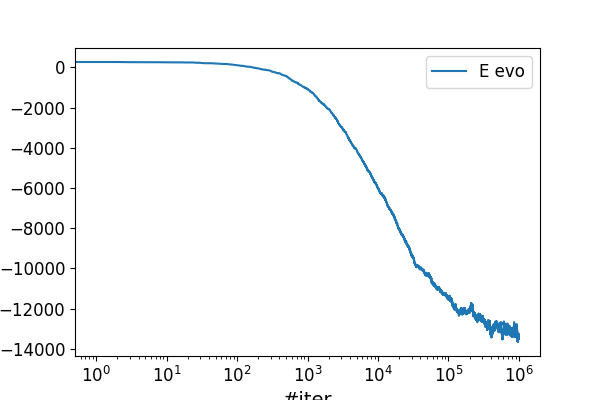

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.semilogx( energy_evolution, label="E evo")

ax.set_xlabel("#iter")
ax.set_ylabel("E")
ax.legend()

### Exercise 4.6
Can you distinguish two qualitatively different periods? What do they correspond to?

The metropolis algorithm should simulate thermalization.

The system starts out of equilibrion in a random configuration and that corresponds to the initial plateau. This is of course an unstable configuration for the temperature chosen and the system drifts towards the one characterized by thermal equilibrium, that is the later critical and a bit noisy configuration

# Efficient Metropolis
Our implementation of the Ising model was not very efficient. To do this exercice, we will use part of the code from Sethna's book, which is much more efficient and can be found here:

[Sethan's book computer exercices](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/ComputerExercises/Ising/Ising.html)

To import code from an external file, we need to add its directory to the PATH



In [17]:
%load_ext autoreload

import sys
sys.path.append("../code/")
from ising_sethna import IsingModel

Their implementation is based on a `Class`, which means we need to instantiate the model. For instance:

In [18]:
# create an instance of IsingModel
ising = IsingModel(N=100)

In [19]:
# the state of the system is stored in .lattice
ising.lattice

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

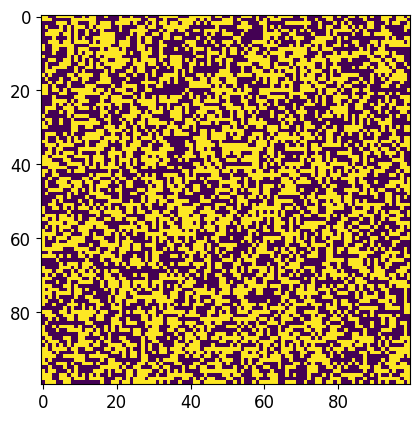

In [20]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
plt.imshow(ising.lattice)

Notice that this implementation uses 0, 1 spins instead of -1, 1 as we are used to! To run the simulation, we call the `.SweepMetropolis()` method. If you go to the source file at `SethnasBookCode/Ising.py`, you can inspect all the code. You will notice that all `.Sweep...()` methods perform $N^2$ updates per time-step. This is useful because time-scales become independent of system size.

In [21]:
ising.SweepMetropolis(nTimes=100)

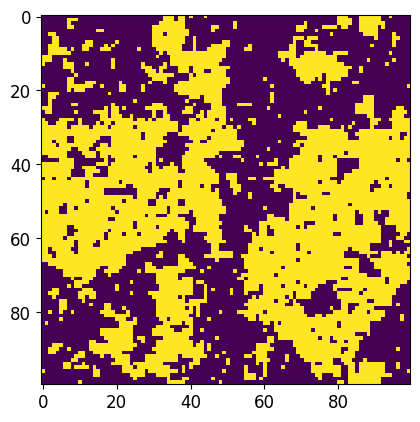

In [22]:
plt.imshow(ising.lattice)

The cell bellow will display 3 systems side-by-side, running at different temperatures. All parameters are set at the top. Try changing some values and see what happens.

In [26]:
#################
# set parameters
system_size = 100
H = 0.0
T_below = .5
T_critical = 2.269185314213022
T_above = 10
n_sweeps = 100
###############

# create three instances of IsingModel
ising_below = IsingModel(N=system_size, T=T_below, H=H)
ising_critical = IsingModel(N=system_size, T=T_critical, H=H)
ising_above = IsingModel(N=system_size, T=T_above, H=H)

# give them names
isings = [ising_below, ising_critical, ising_above]
labels = ["below $T_c$", "at $T_c$", "above $T_c$"]

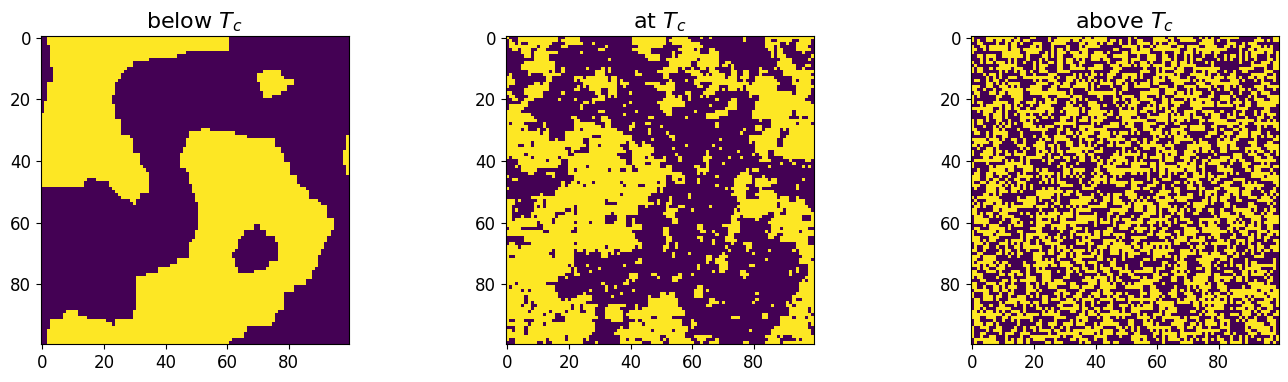

In [27]:
fig, axx = plt.subplots(1, 3, figsize=(17,4))
heatmap = {}
for ax, ising, label in zip(axx, isings, labels):
    heatmap[label] = ax.imshow(ising.lattice)
    ax.set_title(label, fontsize=16)

for _ in range(n_sweeps):
    for ax, ising, label in zip(axx, isings, labels):
        ising.SweepMetropolis(nTimes=1)
        heatmap[label].set_data(ising.lattice)
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Exercice 4.7
How much faster is Sethna's implementation with respect to ours? Use the cell magic `%%timeit` to measure how long a command takes to execute.

To do a fair comparison, remember to take into account what "one update" means for each case.

In [30]:
iter = 500000
size = 200
aT = np.random.rand()*5 + .1

In [31]:
%%timeit

# your Ising implementation running for some number of updates

myConfig = create_initial_config(N = size)

for i in range(iter):
    metropolis_single_update(myConfig, T = aT)

11.8 s ± 556 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
%%timeit
# Sethan's implementation running for some **equivalent** number of updates

sweeps = int( iter/ (size**2))

sethnaConfig = IsingModel(N=size, T=aT, H=0)
sethnaConfig.SweepMetropolis(nTimes = sweeps)

2.72 s ± 82.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Decisamente più veloce accetto la mia inferiorità

## Magnetization
We will now compute the magnetization $M$ as a function of the temperature $T$. To speed up simulations even more, we will use the Wolff algorithm, which Sethna's code already implements in the `.SweepWolff()` method.

### Exercise 4.8
For a system of size $N=100$, approximately how many sweeps of the Wolff algorithm are necessary in practice to be in equilibrium? Try starting with smaller values of $N$, and increase gradually. 

In [69]:
# set system size, temperature
size = 100
aT = 1

#seed fo reproduce the same starting conditions
seed = 123456

iter_arr = np.arange(1,10)
#print(iter_arr)
# run some Wolff sweeps, check if equilibrium

for i in range(len(iter_arr)):
    #reset ising model
    aIsing = IsingModel(N = size, H =0, T = aT, seed = seed)
    aIsing.SweepWolff(nTimes = iter_arr[i])

    M = aIsing.lattice.sum()*2 - size**2

    print("#iter : \t{} out of {} // Current M : \t{}".format(i+1, len(iter_arr), M))

#aIsing.SweepWolff(nTimes =)


#iter : 	1 out of 9 // Current M : 	-6636
#iter : 	2 out of 9 // Current M : 	8428
#iter : 	3 out of 9 // Current M : 	9768
#iter : 	4 out of 9 // Current M : 	-9964
#iter : 	5 out of 9 // Current M : 	9998
#iter : 	6 out of 9 // Current M : 	-9986
#iter : 	7 out of 9 // Current M : 	9992
#iter : 	8 out of 9 // Current M : 	-9994
#iter : 	9 out of 9 // Current M : 	9980


4/5 iterations seems to be safe enough

### Exercise 4.9
Write a function that computes the magnetization of a 2D Ising system after certain equilibration period.

In [62]:
def calculate_magnetization(system_size=None, temperature=None, equilibration_time=None):
    """
    Calculate the magnetization of a 2D Ising model.
    
    Parameters
    ----------
    system_size : int
        The lattice size.
    temperature : float
        The simulation temperature.
    equilibration_time : int
        Number of Wolff sweeps before measuring M.
        
    """
    # instantiate model
    aIsing = IsingModel( N = system_size,T = temperature, H = 0)
    # equilibrate
    aIsing.SweepWolff(nTimes=equilibration_time)
    # compute magnetization
    m = aIsing.lattice.sum()*2 - system_size**2
    return m


### Exercise 4.10
+ Compute the magnetization for a system of size $N=64$, for diverent values of $T\in[1.5, 3.5]$.
+ Remember to choose wisely the equilibration time!
+ Plot $|M|$ as a function of $T$, and mark the critical temperature in your plot using the `plt.axvline()` function.

In [67]:
# define range of temperatures
temperatures = np.linspace(1.5, 3.5, num= 100)
# system size
system_size = 64
# equilibration time
equilibration_time = 5

# loop over temperatures, compute magnetizations
magnetizations = np.empty( len(temperatures))

for i in range(len(temperatures)):
    magnetization = calculate_magnetization(system_size= system_size, temperature=temperatures[i],equilibration_time=equilibration_time)
    magnetizations[i] = magnetization

    
    print("#iter : \t{} out of {} // Current M : \t{}".format(i+1, len(temperatures), magnetization))

#iter : 	1 out of 100 // Current M : 	4010
#iter : 	2 out of 100 // Current M : 	4004
#iter : 	3 out of 100 // Current M : 	-4020
#iter : 	4 out of 100 // Current M : 	-4002
#iter : 	5 out of 100 // Current M : 	4022
#iter : 	6 out of 100 // Current M : 	-4000
#iter : 	7 out of 100 // Current M : 	-3966
#iter : 	8 out of 100 // Current M : 	-3990
#iter : 	9 out of 100 // Current M : 	-3992
#iter : 	10 out of 100 // Current M : 	-3974
#iter : 	11 out of 100 // Current M : 	3936
#iter : 	12 out of 100 // Current M : 	-3970
#iter : 	13 out of 100 // Current M : 	-3962
#iter : 	14 out of 100 // Current M : 	3912
#iter : 	15 out of 100 // Current M : 	3960
#iter : 	16 out of 100 // Current M : 	-3776
#iter : 	17 out of 100 // Current M : 	3742
#iter : 	18 out of 100 // Current M : 	-3562
#iter : 	19 out of 100 // Current M : 	3814
#iter : 	20 out of 100 // Current M : 	-3704
#iter : 	21 out of 100 // Current M : 	3594
#iter : 	22 out of 100 // Current M : 	3784
#iter : 	23 out of 100 // Cur

Text(0, 0.5, 'M')

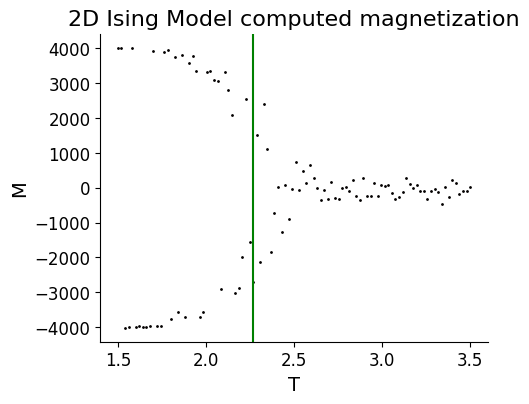

In [68]:
# define critical temperature
T_c = 2.269185314213022

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(
    temperatures, magnetizations,
    # style keywords
    edgecolors="black", color = "red", s=1
)
ax.axvline(
    T_c,
    # style keywords
    c= "green"
)
ax.set_title("2D Ising Model computed magnetization")
ax.set_xlabel("T")
ax.set_ylabel("M")

## Susceptibility and Specific Heat


In this exercice, we will compute the susceptibility $\chi$ and the specific heat $C$. Using formula (6.13) in the book, we have that
$$
C = \frac{1}{T^2} \left\langle (E - \langle E \rangle)^2 \right\rangle.
$$
Remember that this is only valid in **equilibrium**, which means that we can only measure energy fluctuations **after a transient** equilibration time.

### Exercise 4.11
Find a convenient formula to measure the susceptibility $\chi$ in a simulation.

*Your answer here*

### Exercise 4.12
Write a function that computes the energy of an Ising configuration.

As usually, you can use the **template** below if it helps you, or if you prefer you can also write **your own function** from scratch.

In [ ]:
def compute_energy(ising):
    """Compute the energy of an ising object."""
    config = ising.lattice*2-1
    N = len(config)
    
    edges = ...
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= ...
    return E / N**2

### Exercise 4.13
Write a function that computes the susceptibility and the specific heat of a 2D Ising system. You might use the Wolff algorithm to speed up your simulations.

In [ ]:
def calculate_susceptibility_specific_heat(system_size=None, temperature=None, equilibration_time=None, n_samples=None):
    """
    Simulate a 2D Ising model and measure its
    specific heat and susceptibility at equilibrium.
    
    Parameters
    ----------
    system_size : int
        The lattice side length.
    temperature :  float.
        The simulation temeperature.
    equilibration_time : int
        A transient period to allow for thermalization.
    n_samples : int
        The number of samples taken to compute fluctuations.

    """
    # initiate model
    ...
    # thermalize
    ...
    
    # create empty lists for magnetizations, energies, and their squares
    ms = []
    m2s = []
    es = []
    e2s = []
    
    # loop over n_samples 
    for _ in range(n_samples):
        # change from 0,1 to -1,1 notation
        ...
        # get magnetization
        ...
        ms.append(m)
        m2s.append(m**2)
        # get energy
        ...
        es.append(e)
        e2s.append(e**2)
        # update system
        ...
    
    # compute susceptibility and specific heat
    susceptibility = ...
    specific_heat = ...
    
    return susceptibility, specific_heat



### Exercise 4.14
+ Compute $C$ and $\chi$ at different temperatures, for a small system of size $N<50$. You will need to find what are the right equilibration times. A good range of temperatures is $T \in [1.5, 3.5]$.
+ Make two plots, showing $\chi$ and $C$ as a function of $T$. Mark the critical temperature $T_c$ with a vertical line using `ax.axvline(...)`.

In [ ]:
# define range of temperatures: 50 points from 1.5 to 4.
temperatures = ...
# system size
system_size = ...
# equilibration time
equilibration_time = ...
# n_samples
n_samples = ...

# loop over temperatures, compute susceptibility and specific_heat
...
...
...


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

ax=ax1
ax.plot(...)
ax.axvline(...)
ax.set_ylabel(...)
ax.set_xlabel(...)
ax.set_title(...)

ax=ax2
ax.plot(...)
ax.axvline(...)
ax.set_ylabel(...)
ax.set_xlabel(...)
ax.set_title(...)


### Exercise 4.15
Discuss whether or not your results proof the existence of a phase transition.

*Your answer here*

# Finding clusters
Given an Ising configuration, we define a cluster of spins as a set of neighbouring spins of the same sign surrounded by spins of the opposite sign.

<img src="attachment:image.png" width="600">

### Exercise 4.16
The formal definition of cluster is very clear, but in practice, how do you find (*efficiently* if possible) all clusters for a given configuration? We need to assign a **unique cluster label** to each spin. The cluster label could be anything (a color, a letter, a number...), it just needs to be the same for all spins that belong to the same cluster. For simplicity, we will use integers.

Think about an algorithm that assigns unique cluster labels to spins. Explain your algorithm in simple words / steps / pseudocode.

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!

*Your answer here*

### Exercise 4.17
Write a function that, given a configuration array `config`, returns another array `labels` where each cluster has a different label.

<img src="attachment:image.png" width="600">

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!


In [ ]:
def get_labels(config):
    """
    Get unique cluster labels.
    
    Parameters
    ----------
    config : np.array, (N, N)
        Configuration of the system in {-1, 1} notation
    Returns
    -------
    labels : np.array, (N, N)
        Labels that identify the clusters
    """
    ...
            
    return labels

### Test your function
To help you **test** your function, I have prepared some test data, so that we can all try our algorithms using the same input.

In [ ]:
config_test_0 = np.array([[ 1,  1,  1],
                          [-1, -1,  1],
                          [-1, -1,  1]])

In [ ]:
config_test_1 = np.array([[ 1, -1, -1,  1, -1,  1],
                          [-1, -1, -1,  1, -1,  1],
                          [-1,  1, -1, -1, -1,  1],
                          [-1,  1, -1,  1,  1,  1],
                          [-1,  1, -1, -1,  1, -1],
                          [-1, -1, -1,  1,  1,  1]])

In [ ]:
config_test_2 = np.array([[ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [-1, -1, -1,  1,  1, -1, -1, -1,  1, -1],
                          [ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1],
                          [ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1],
                          [-1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [ 1, -1, -1, -1,  1, -1,  1,  1, -1,  1],
                          [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1],
                          [-1, -1, -1, -1,  1,  1, -1, -1, -1,  1],
                          [ 1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
                          [ 1,  1, -1, -1, -1,  1,  1,  1,  1, -1]])


Execute the following cell to make sure your function works correctly. The left column will show the test configurations, and the right column will show the clusters your function found, with different clusters colored in different colors

In [ ]:
for i, config in enumerate([config_test_0, config_test_1, config_test_2]):
    labels = get_labels(config)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.set_xticks(range(len(config)))
    ax1.set_yticks(range(len(config)))
    ax2.set_xticks(range(len(config)))
    ax2.set_yticks(range(len(config)))
    ax1.set_title("Configuration")
    ax2.set_title("Clusters")
    ax1.imshow(config, cmap="Greys")
    ax2.imshow(labels, cmap="rainbow")
    
    fig.suptitle(f"Test data {i}", fontsize=22)

If your function doesn't work, you might want to use this cell to inspect your results

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_aspect(1)
sns.heatmap(labels, annot=True, ax=ax, cmap="viridis")

### Measuring cluster sizes
Use your `get_labels()` function to find clusters in a large Ising model, say $N=500$. You can use your own Ising implementation. If you use Sethna's code, remember that he uses $s \in \{0, 1\}$ spins!

In [ ]:
...
...
...
labels = get_labels(config)

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(labels)

### Exercise 4.18
Find an efficient way to measure cluster sizes. Remind that all you care about is the distribution of cluster sizes, their location does not matter. You might want to use the `.reshape()` method of a numpy array, and the `Counter` class from the `collections` package.

In [ ]:
def get_sizes(labels):
    ...
    ...
    ...
    return sizes

### Exercise 4.19
For $T >> T_c$, spins are essentially uncorrelated. What is the distribution of cluster sizes you expect to find in this case? **Hint** Think about the 1D case assuming totally uncorrelated spins.

*Your answer here*



### Exercice 4.20
Do a simulation at very high temperature and measure the cluster size distribution. Plot your results in log-log scale. Do your results agree with your previous answer?

*Your answer here*

In [ ]:
...
...
config = ...
labels = get_labels(config)
sizes = get_sizes(labels)

In [ ]:
# use logarithmic bins and logarithmic axes!
bins = np.geomspace(min(sizes), max(sizes), num=20)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sizes, bins=bins, histtype="step")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes), max(sizes))

### Exercise 4.21

At $T_c$, the distribution of cluster sizes is known to be a power law with exponent close to $\alpha \simeq 2$.

$$
P(s) \propto s^{-\alpha}
$$

Do a simulation at $T=T_c$ and compare the resulting cluster size distribution with that obtained at $T>>T_c$.

In [ ]:
# do simulation
...
...


In [ ]:
# plot results
...
...